3. Pima Indians Diabetes Dataset

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

Number of times pregnant.
Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
Diastolic blood pressure (mm Hg).
Triceps skinfold thickness (mm).
2-Hour serum insulin (mu U/ml).
Body mass index (weight in kg/(height in m)^2).
Diabetes pedigree function.
Age (years).
Class variable (0 or 1).
The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 65%. Top results achieve a classification accuracy of approximately 77%.



In [269]:
import csv

rawdata = []
with open("data/pima_indians_diebetes/pima-indians-diabetes.data.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
            rawdata.append(row)
            line_count += 1
    print(f'Processed {line_count} lines.')

Processed 768 lines.


In [270]:
import numpy as np
import matplotlib.pyplot as plt


In [271]:
rawdata = np.array(rawdata)

In [272]:
x_raw = rawdata[:,0:8]
y_raw = rawdata[:,8]
# for row in x_raw:
#     print(row)

In [273]:
x_raw = x_raw.astype(float)
y_raw = y_raw.astype(float)

In [274]:
# for row in x_raw:
#     print(row)
print(x_raw.shape)
print(y_raw.shape)

(768, 8)
(768,)


In [275]:
x_isna = False
y_isna = False
for row in x_raw:
    if(np.isnan(np.min(row)) == True):
        x_isna =True
        
for row in y_raw:
    if(np.isnan(np.min(row)) == True):
        y_isna =True
print(x_isna)
print(y_isna)

False
False


<function matplotlib.pyplot.show(*args, **kw)>

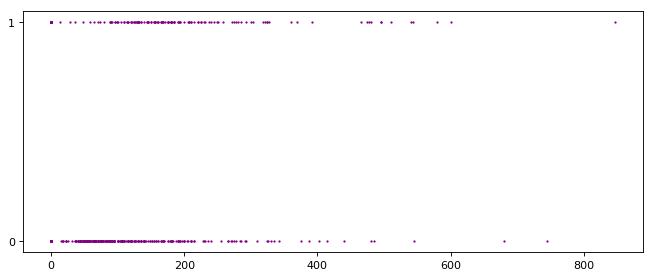

In [276]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# plt.scatter(x_raw[:,0],y_raw,1,c = "blue")
# plt.scatter(x_raw[:,1],y_raw,1,c = "red")
# plt.scatter(x_raw[:,2],y_raw,1,c = "green")
# plt.scatter(x_raw[:,3],y_raw,1,c = "black")
plt.scatter(x_raw[:,4],y_raw,1,c = "purple")
# plt.scatter(x_raw[:,5],y_raw,1,c = "pink")
# plt.scatter(x_raw[:,6],y_raw,1,c = "maroon")
# plt.scatter(x_raw[:,7],y_raw,1,c = "green")
plt.yticks([0,1]) 
plt.show

In [277]:
np.mean(x_raw[:,4])

79.79947916666667

In [278]:
[abs (x_raw[:,4] - np.mean(x_raw[:,4])) < 1 * np.std(x_raw[:,4])].index(False)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [279]:
x_raw.shape

(768, 8)

<function matplotlib.pyplot.show(*args, **kw)>

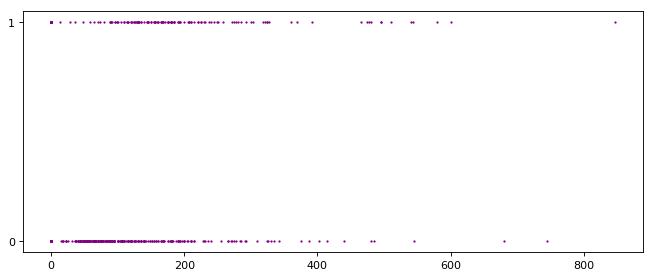

In [280]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# plt.scatter(x_raw[:,0],y_raw,1,c = "blue")
# plt.scatter(x_raw[:,1],y_raw,1,c = "red")
# plt.scatter(x_raw[:,2],y_raw,1,c = "green")
# plt.scatter(x_raw[:,3],y_raw,1,c = "black")
plt.scatter(x_raw[:,4],y_raw,1,c = "purple")
# plt.scatter(x_raw[:,5],y_raw,1,c = "pink")
# plt.scatter(x_raw[:,6],y_raw,1,c = "maroon")
# plt.scatter(x_raw[:,7],y_raw,1,c = "green")
plt.yticks([0,1]) 
plt.show

In [281]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw, test_size=0.3)

In [282]:
from sklearn.linear_model import LogisticRegression

In [283]:
clf1 = LogisticRegression().fit(x_train, y_train)

/Users/j/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [284]:
print( clf1.score(x_train, y_train) )
print( clf1.score(x_test, y_test) )

0.7746741154562383
0.7792207792207793


<function matplotlib.pyplot.show(*args, **kw)>

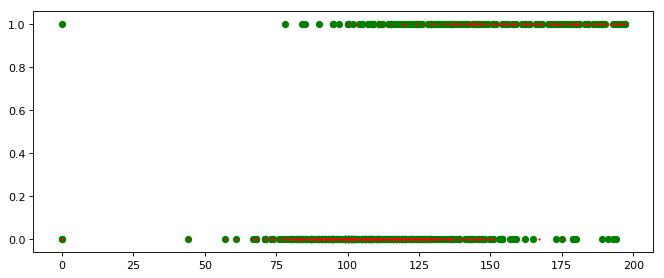

In [285]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x_train[:,1],y_train,30,c = "green")
plt.scatter(x_train[:,1],clf1.predict(x_train),1,c = "red")
plt.show

In [286]:
from sklearn.svm import SVC

In [301]:
clf20 = SVC(gamma = 'scale',kernel='linear').fit(x_train, y_train)

In [302]:
clf21 = SVC(gamma = 'scale',kernel='linear').fit(x_train, y_train)

In [303]:
print( clf20.score(x_train, y_train) )
print( clf20.score(x_test, y_test) )

0.770949720670391
0.7792207792207793


In [304]:
print( clf21.score(x_train, y_train) )
print( clf21.score(x_test, y_test) )

0.770949720670391
0.7792207792207793


<function matplotlib.pyplot.show(*args, **kw)>

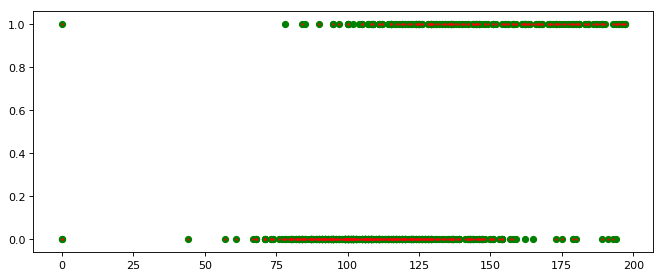

In [289]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x_train[:,1],y_train,30,c = "green")
plt.scatter(x_train[:,1],clf2.predict(x_train),1,c = "red")
plt.show

In [290]:
from sklearn.neural_network import MLPClassifier

In [239]:
besthp ={}
bestsc = []
for x in range(1,30,2):
    for y in range(1,30,2):
        print(x,y)
        clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(x,y), random_state=1).fit(x_train, y_train)
#         besthp.update(clf3.score(x_test, y_test)=(x,y))
        bestsc.append(clf3.score(x_test, y_test))


1 1
1 3
1 5
1 7
1 9
1 11
1 13
1 15
1 17
1 19
1 21
1 23
1 25
1 27
1 29
3 1
3 3
3 5
3 7
3 9
3 11
3 13
3 15
3 17
3 19
3 21
3 23
3 25
3 27
3 29
5 1
5 3
5 5
5 7
5 9
5 11
5 13
5 15
5 17
5 19
5 21
5 23
5 25
5 27
5 29
7 1
7 3
7 5
7 7
7 9
7 11
7 13
7 15
7 17
7 19
7 21
7 23
7 25
7 27
7 29
9 1
9 3
9 5
9 7
9 9
9 11
9 13
9 15
9 17
9 19
9 21
9 23
9 25
9 27
9 29
11 1
11 3
11 5
11 7
11 9
11 11
11 13
11 15
11 17
11 19
11 21
11 23
11 25
11 27
11 29
13 1
13 3
13 5
13 7
13 9
13 11
13 13
13 15
13 17
13 19
13 21
13 23
13 25
13 27
13 29
15 1
15 3
15 5
15 7
15 9
15 11
15 13
15 15
15 17
15 19
15 21
15 23
15 25
15 27
15 29
17 1
17 3
17 5
17 7
17 9
17 11
17 13
17 15
17 17
17 19
17 21
17 23
17 25
17 27
17 29
19 1
19 3
19 5
19 7
19 9
19 11
19 13
19 15
19 17
19 19
19 21
19 23
19 25
19 27
19 29
21 1
21 3
21 5
21 7
21 9
21 11
21 13
21 15
21 17
21 19
21 21
21 23
21 25
21 27
21 29
23 1
23 3
23 5
23 7
23 9
23 11
23 13
23 15
23 17
23 19
23 21
23 23
23 25
23 27
23 29
25 1
25 3
25 5
25 7
25 9
25 11
25 13
25 15
25 17
25 19


In [247]:
(max(bestsc))

0.7662337662337663

In [305]:
clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(23,15), random_state=1).fit(x_train, y_train)


In [306]:
print( clf3.score(x_train, y_train) )
print( clf3.score(x_test, y_test) )

0.750465549348231
0.7142857142857143
